In [302]:
import os
import pandas as pd

In [303]:
os.chdir("C:\\Users\Abhirup Sarkar\Desktop")

In [304]:
#df = pd.read_csv("C:\\Users\Abhirup Sarkar\Desktop\application_train.csv")
df_train = pd.read_csv("application_train.csv")

In [305]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [306]:
x_train = missing_values_table(df_train)
x_train

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [307]:
x_train_modify = x[x['% of Total Values']< 30]
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [308]:
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [309]:
type(x_train_modify)

pandas.core.frame.DataFrame

In [310]:
df_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

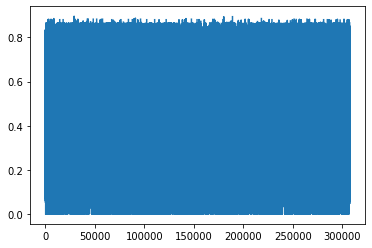

In [311]:
df_train['EXT_SOURCE_3'].plot()

In [312]:
import seaborn as sns

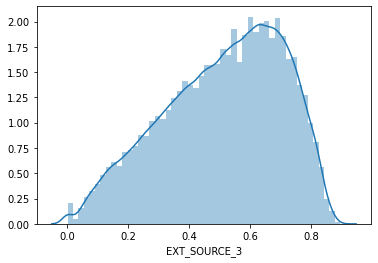

In [313]:
sns.distplot(df_train['EXT_SOURCE_3'])

In [314]:
df_train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [315]:
df_train['EXT_SOURCE_3'].median()

0.5352762504724826

In [316]:
df_train[['EXT_SOURCE_3_impute']] = df_train['EXT_SOURCE_3'].fillna(df_train['EXT_SOURCE_3'].median())

In [317]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [318]:
df_train.drop(['EXT_SOURCE_3'], axis=1, inplace=True )

In [319]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [320]:
## Imputation

In [321]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])

In [322]:
df_train.drop(['AMT_REQ_CREDIT_BUREAU_WEEK'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0


In [323]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0


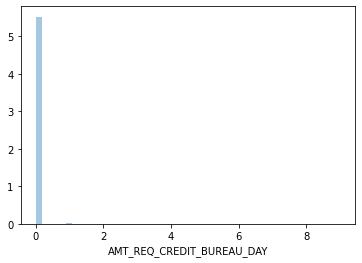

In [324]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'])

In [325]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[['AMT_REQ_CREDIT_BUREAU_DAY_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])

In [326]:
df_train.head()
df_train.drop(['AMT_REQ_CREDIT_BUREAU_DAY'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0,0.0


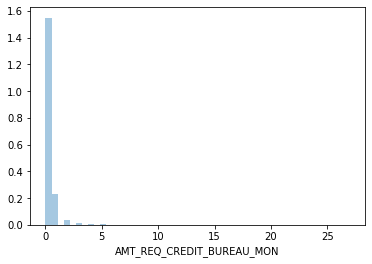

In [327]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'])

In [328]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[['AMT_REQ_CREDIT_BUREAU_MON_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

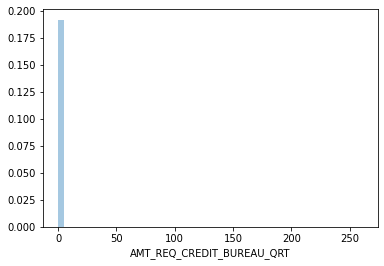

In [329]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'])

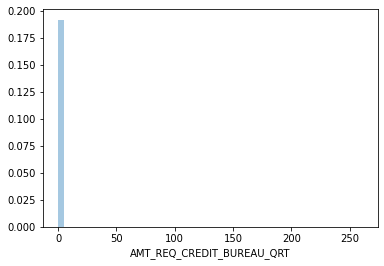

In [330]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'])
df_train[['AMT_REQ_CREDIT_BUREAU_QRT_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

In [331]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0


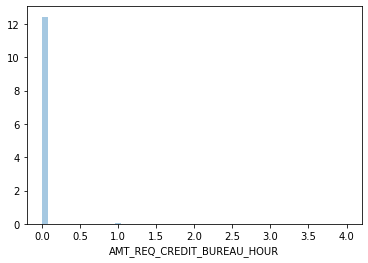

In [332]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'])
df_train[['AMT_REQ_CREDIT_BUREAU_HOUR_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0


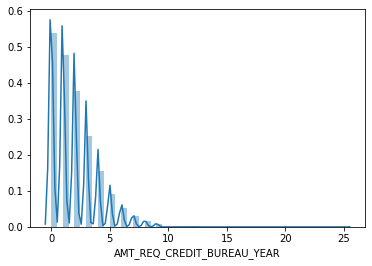

In [333]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'])
df_train[['AMT_REQ_CREDIT_BUREAU_YEAR_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
df_train.head()

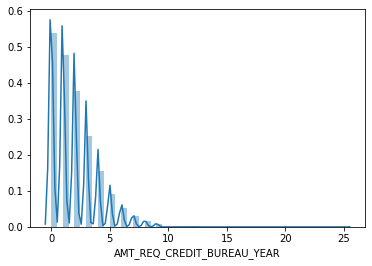

In [334]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [335]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,1.0,0.218859,0.0,0.0,1.0,0.0,1.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [410]:
#df_train.drop(['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON' ], axis = 1, inplace=True) 
df_train.drop(['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_YEAR' ], axis = 1, inplace=True) 

In [356]:
#df_train.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','FLOORSMIN_MODE'], axis=1, inplace = True)

In [ ]:
#df_train.drop([], axis=1, inplace = True)
#df_train.drop([], axis=1, inplace = True)

In [358]:
x_train_modify2 = x[x['% of Total Values']> 30]
x_train_modify2

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [360]:
export_csv = x_train_modify2.to_csv('dataframe.csv', header=True)

In [362]:
Ls = [
'FLOORSMIN_MEDI',
'FLOORSMIN_AVG',
'YEARS_BUILD_MODE',
'YEARS_BUILD_MEDI',
'YEARS_BUILD_AVG',
'OWN_CAR_AGE',
'LANDAREA_AVG',
'LANDAREA_MEDI',
'LANDAREA_MODE',
'BASEMENTAREA_MEDI',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'EXT_SOURCE_1',
'NONLIVINGAREA_MEDI',
'NONLIVINGAREA_MODE',
'NONLIVINGAREA_AVG',
'ELEVATORS_MEDI',
'ELEVATORS_MODE',
'ELEVATORS_AVG',
'WALLSMATERIAL_MODE',
'APARTMENTS_MODE',
'APARTMENTS_MEDI',
'APARTMENTS_AVG',
'ENTRANCES_MODE',
'ENTRANCES_AVG',
'ENTRANCES_MEDI',
'LIVINGAREA_MEDI',
'LIVINGAREA_MODE',
'LIVINGAREA_AVG',
'HOUSETYPE_MODE',
'FLOORSMAX_MEDI',
'FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'TOTALAREA_MODE',
'EMERGENCYSTATE_MODE',
'OCCUPATION_TYPE']

In [363]:
for i in Ls:
    df_train.drop(i, axis=1, inplace = True)

In [386]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'LIVINGAPARTMENTS_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_

In [387]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
df_train.isna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
307507,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [388]:
df_train[('NAME_TYPE_SUITE_impute')] = df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied


In [389]:
df_train[('DEF_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0


In [390]:
df_train[('OBS_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0


In [391]:
df_train[('DEF_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0


In [392]:
df_train[('OBS_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0


In [393]:
df_train[('EXT_SOURCE_2_impute')] = df_train['EXT_SOURCE_2'].fillna(df_train['EXT_SOURCE_2'].median())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738


In [394]:
df_train[('AMT_GOODS_PRICE_impute')] = df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0


In [395]:
df_train.drop(['NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE'], axis = 1, inplace=True)

In [399]:
df_train.head(include=all)

TypeError: head() got an unexpected keyword argument 'include'

In [414]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'LIVINGAPARTMENTS_MODE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_